# Диод Шоттки

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm 
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.constants as const

In [2]:
data = pd.read_csv("data_1.csv")
data.head()

,Bias,Current,Resistance
0,0.0,1.253200e-08,0.0
1,-0.2,-7.826100e-09,25556000.0
2,-0.4,-9.111000e-07,439030.0
3,-0.6,-5.846800e-05,10262.0
4,-0.8,-2.704400e-04,2958.1


In [3]:
data.tail()

,Bias,Current,Resistance
119,0.8,3.179800e-08,25159000.0
120,0.6,2.858900e-08,20987000.0
121,0.4,2.474000e-08,16168000.0
122,0.2,1.982300e-08,10089000.0
123,0.0,1.278600e-08,0.0


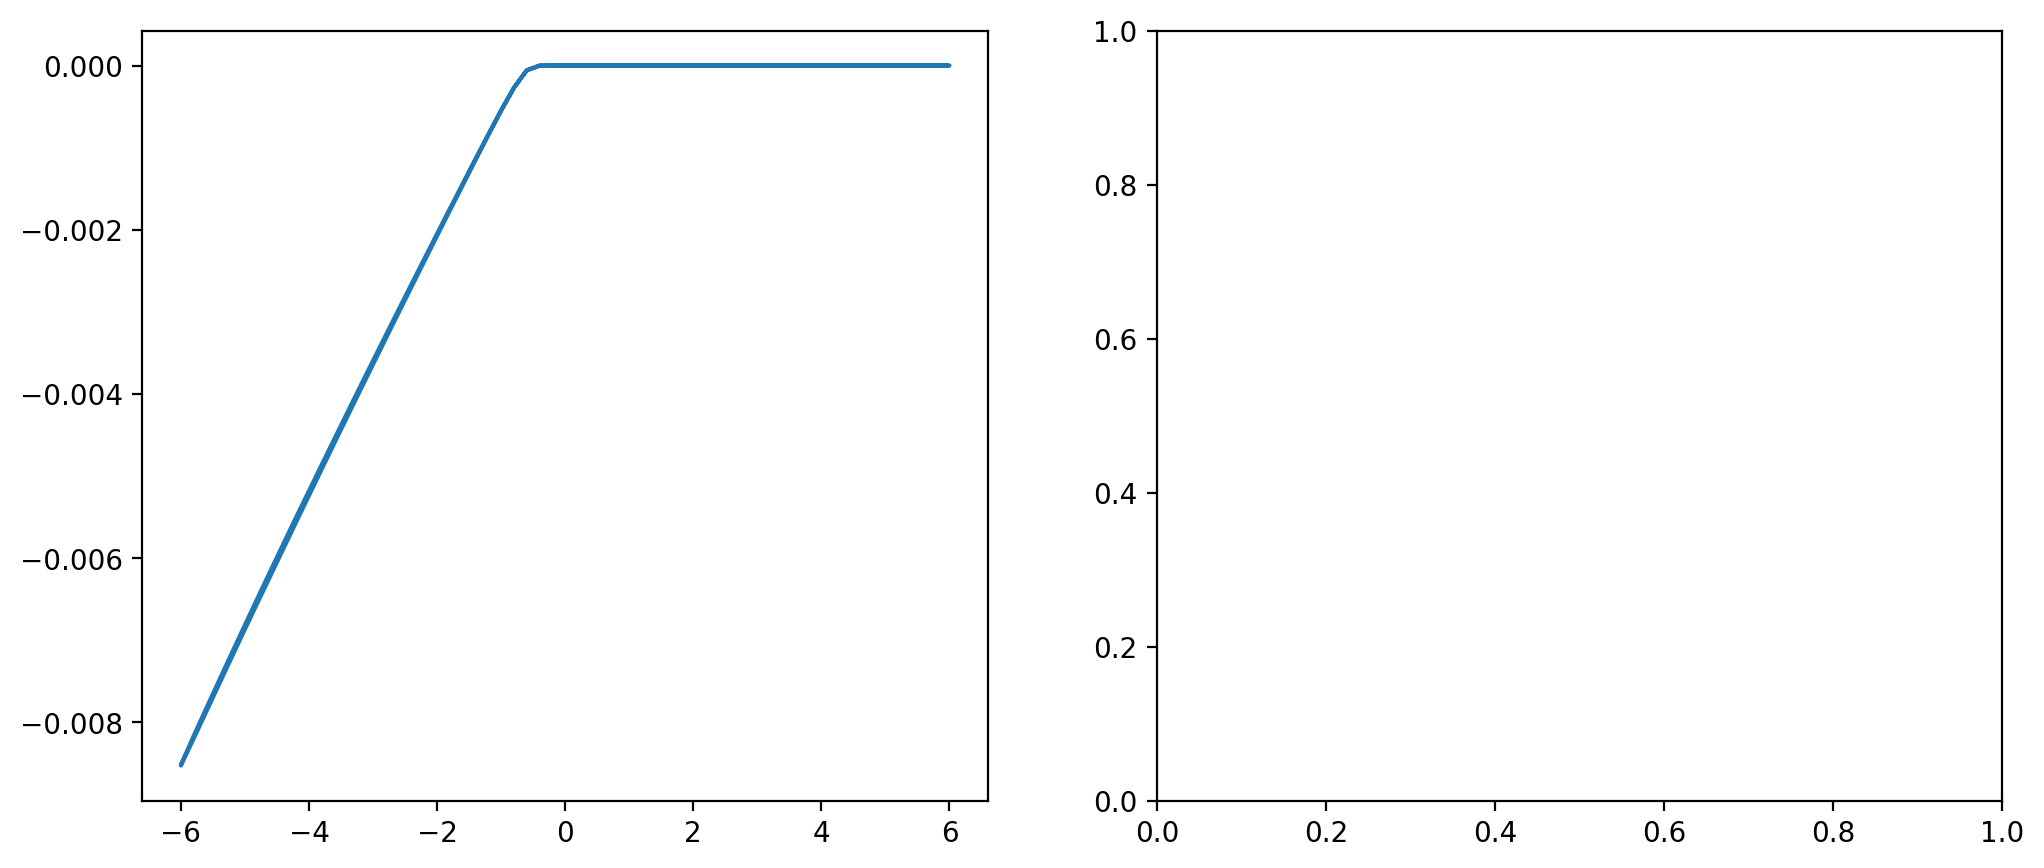

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)


ax[0].plot(data.Bias, data.Current)

In [10]:
data_numbers = np.arange(6) + 1
data_paths = [f'data_{i}.csv' for i in data_numbers]

for num, path in enumerate(data_paths):
    data = pd.read_csv(path)
    data.Bias *= -1
    fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
    ax[0].plot(data.Bias, data.Current)
    ax[0].set_title("Зависимость тока от напряжения", fontsize = 16)
    ax[0].set_xlabel("$U$$[В]$", fontsize = 16)
    ax[0].set_ylabel("$I$$[А]$", fontsize = 16)
    ax[0].grid(ls = ':')

    print(f"Эксперимент {num}", data.Bias[np.argmin(np.log(np.abs(data.Current)))])

    ax[1].plot(data.Bias, np.log(np.abs(data.Current)), color = 'purple')
    ax[1].set_xlabel("$U$$[В]$", fontsize = 16)
    ax[1].set_ylabel("$ln(|I|)$", fontsize = 16)
    ax[1].set_title("Зависимость логарифма тока от напряжения",fontsize = 16)
    ax[1].grid(ls = ':')
    fig.suptitle(f"Зависимость полученная в {num + 1} - ом эксперимете",
                 fontsize = 16)
    fig.tight_layout()

Эксперимент 0 0.2
Эксперимент 1 -0.0
Эксперимент 2 -0.0
Эксперимент 3 -0.0
Эксперимент 4 -0.0
Эксперимент 5 -0.0


In [6]:
data = pd.read_csv("data_1.csv")
data.head()


data.Bias *= -1

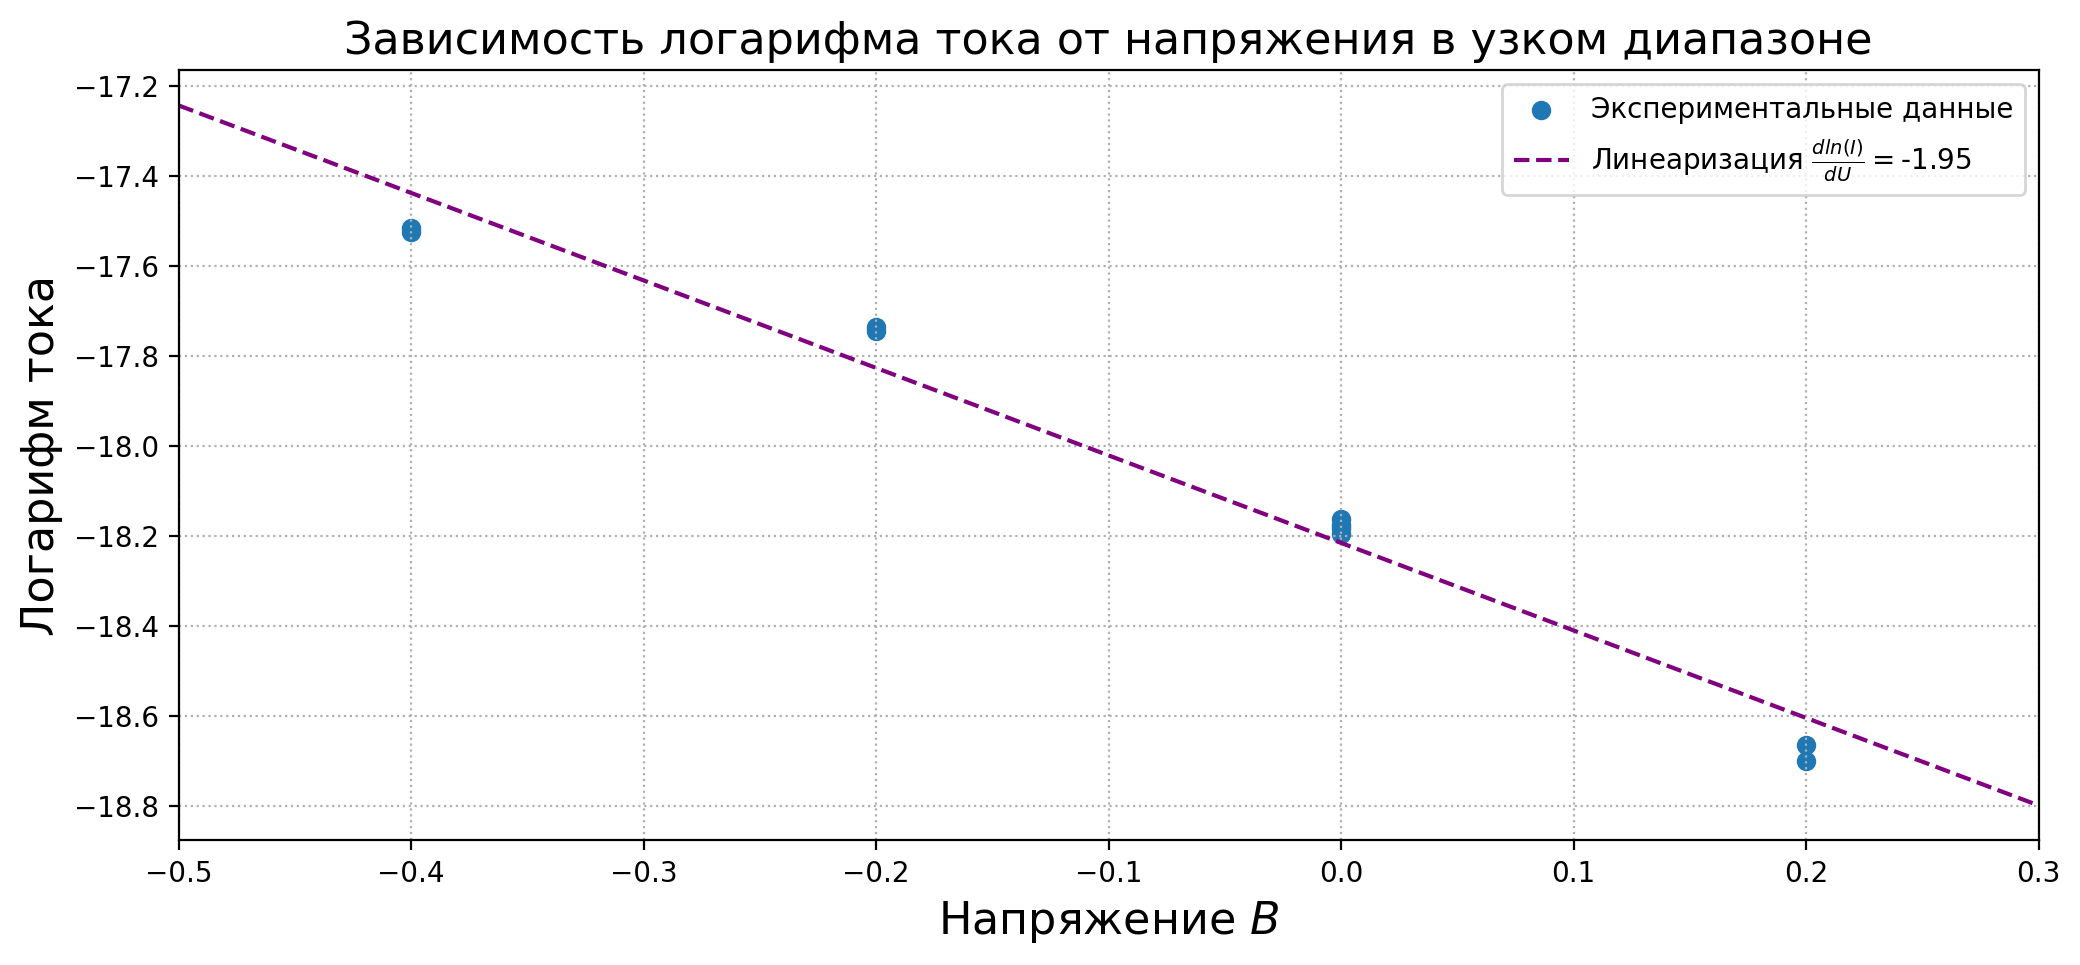

In [7]:
left, right = -0.5, 0.3
mask_1 = (data.Bias >= left) * (data.Bias <= right)
u = data.Bias[mask_1]
lni = np.log(np.abs(data.Current[mask_1]))

MNK = linregress(u, lni)
x_linear = np.linspace(left, right, 1000)
y_linear = MNK.slope * x_linear + MNK.intercept


plt.figure(figsize = (12, 5), dpi = 200)


plt.title("Зависимость логарифма тока от напряжения в узком диапазоне", fontsize = 16)
plt.grid(ls = ":")
plt.scatter(u, lni, label = 'Экспериментальные данные')
plt.plot(x_linear, 
         y_linear, 
         label = r'Линеаризация $\frac{d ln(I)}{dU} = $' + str(round(MNK.slope, 2)),
         color = 'purple',
         linestyle = '--')
plt.xlabel("Напряжение $В$", fontsize = 16)
plt.ylabel("ln(I)", fontsize = 16)
plt.ylabel("Логарифм тока")
plt.xlim(left, right)
plt.legend()

$$
I = S A_{0} T^{2} e^{-\phi_{б}/KT}
$$


(64,)
(64,)


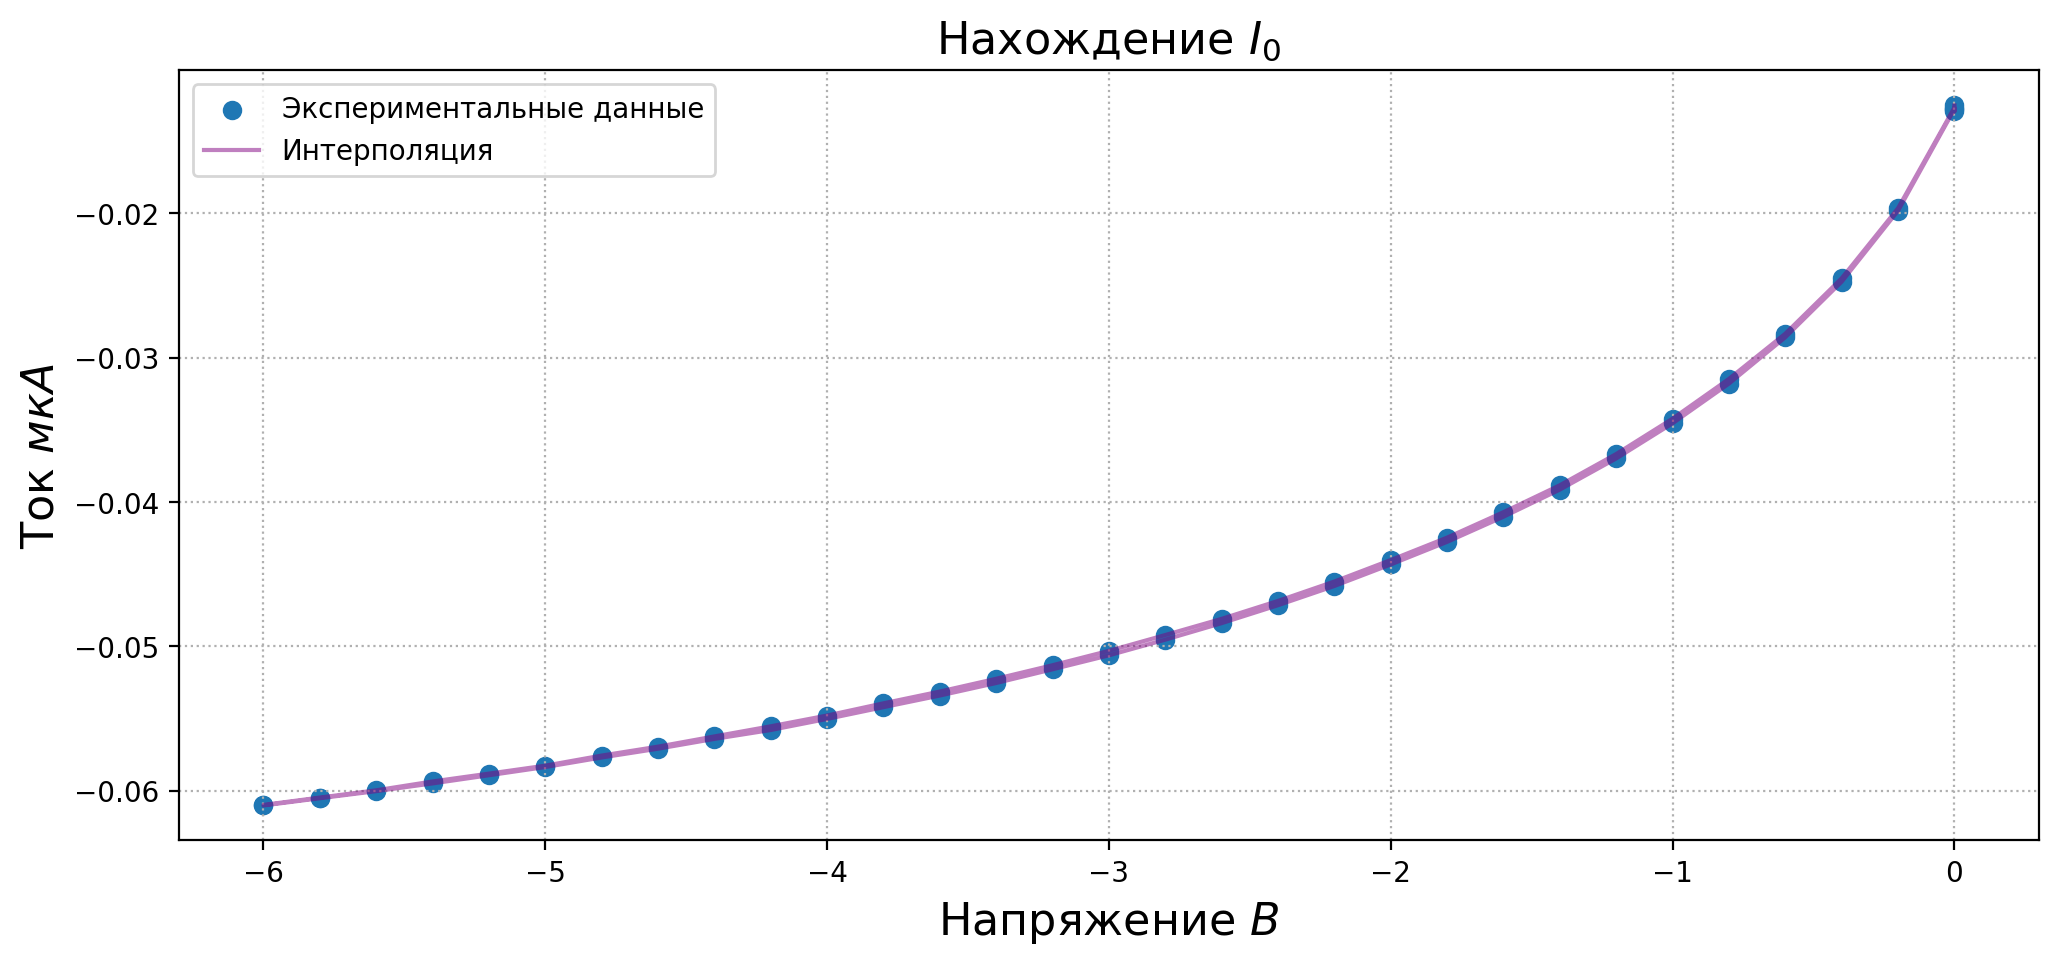

In [8]:
left, right = -np.inf, 0
mask_1 = (data.Bias <= right)
u = data.Bias[mask_1]
i = data.Current[mask_1].astype(np.float128) * (-1) * np.power(10, 6)
print(i.shape)
print(u.shape)




plt.figure(figsize = (12, 5), dpi = 200)


plt.title("Нахождение $I_{0}$", fontsize = 16)
plt.grid(ls = ":")
plt.scatter(u, i, label = 'Экспериментальные данные')
plt.plot(u, i, label = 'Интерполяция', color = 'purple', alpha = 0.5)
plt.xlabel("Напряжение $В$", fontsize = 16)
plt.ylabel("ln(I)", fontsize = 16)
plt.ylabel("Ток $мкА$", fontsize = 16)
plt.legend()

In [9]:
curr = 0.1 * np.power(0.1, 6)
a0 = 120 * np.power(0.1, 4)
s = 70 * 70 * np.power(0.1, 12)
phi = const.k * 293 * np.log(s * a0 * np.power(20, 2) / curr)
phi *= 6.24 * np.power(10, 19)
print(phi)

0.30859516036187007
